In [1]:
import numpy as np
from scipy.linalg import cho_solve, cho_factor
import matplotlib.pyplot as plt
import matplotlib
cmap = 'bwr'

from PIL import Image
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # or 'Times'
    'text.latex.preamble': r'\usepackage{mathptmx}',  # Times in LaTeX
})


In [2]:
import h5py

[Group]   entry0
[Group]   entry0/D22
[Group]   entry0/D22/Distance
[Dataset] entry0/D22/Distance/det1_actual -> shape: (1,)
[Dataset] entry0/D22/Distance/det1_calc -> shape: (1,)
[Dataset] entry0/D22/Distance/det2_actual -> shape: (1,)
[Dataset] entry0/D22/Distance/det2_calc -> shape: (1,)
[Group]   entry0/D22/attenuator
[Dataset] entry0/D22/attenuator/attenuation -> shape: (1,)
[Dataset] entry0/D22/attenuator/position -> shape: (1,)
[Group]   entry0/D22/collimation
[Dataset] entry0/D22/collimation/actual_position -> shape: (1,)
[Dataset] entry0/D22/collimation/ap_size -> shape: (2,)
[Group]   entry0/D22/detector
[Dataset] entry0/D22/detector/det1_actual -> shape: (1,)
[Dataset] entry0/D22/detector/det1_calc -> shape: (1,)
[Dataset] entry0/D22/detector/det2_actual -> shape: (1,)
[Dataset] entry0/D22/detector/det2_calc -> shape: (1,)
[Group]   entry0/D22/selector
[Dataset] entry0/D22/selector/wavelength -> shape: (1,)
[Dataset] entry0/D22/selector/wavelength_res -> shape: (1,)
[Group] 

/tmp/ipykernel_1154493/1967845294.py:66: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-2, vmax=2)


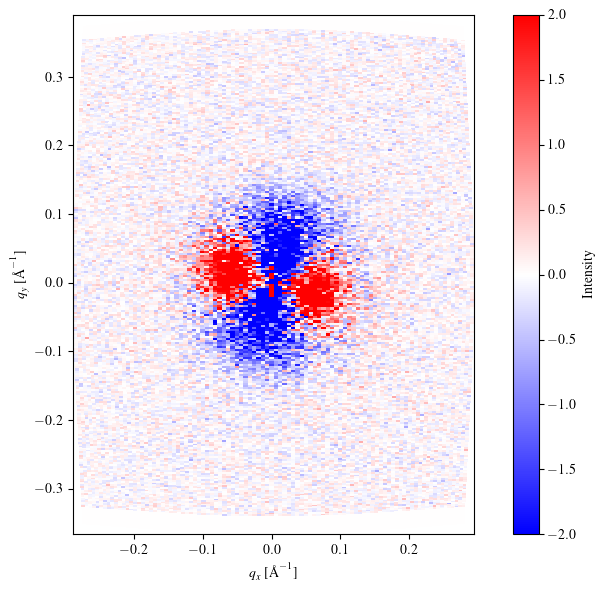

In [3]:
# try load one of the files to check if the data is accessible
filename = "./data/ILL_shear/000055.nxs" 
with h5py.File(filename, 'r') as f:
    # Explore the structure
    def print_tree(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f"[Dataset] {name} -> shape: {obj.shape}")
        else:
            print(f"[Group]   {name}")
    f.visititems(print_tree)
    sample_desc = f['/entry0/sample_description'][()]
    print("Sample description:", sample_desc[0].decode('utf-8'))

I_data_list = []
I_error_list = []

filename = "./data/ILL_shear/000500.nxs" 
with h5py.File(filename, 'r') as f:
    # Define dataset paths
    # path_data = '/entry0/data1/MultiDetector1_data'
    # path_error = '/entry0/data1/error1'
    # path_qx = '/entry0/data1/qx1'
    # path_qy = '/entry0/data1/qy1'
    
    path_data = '/entry0/data2/MultiDetector2_data'
    path_error = '/entry0/data2/error2'
    path_qx = '/entry0/data2/qx2'
    path_qy = '/entry0/data2/qy2'

    # Load and squeeze to remove singleton dimension
    I_data = np.squeeze(f[path_data][()])
    I_error = np.squeeze(f[path_error][()])
    qx = np.squeeze(f[path_qx][()])
    qy = np.squeeze(f[path_qy][()])
    I_data_list.append(I_data)
    I_error_list.append(I_error)

filename = "./data/ILL_shear/000505.nxs"     
with h5py.File(filename, 'r') as f:
    # Define dataset paths
    # path_data = '/entry0/data1/MultiDetector1_data'
    # path_error = '/entry0/data1/error1'
    # path_qx = '/entry0/data1/qx1'
    # path_qy = '/entry0/data1/qy1'
    
    path_data = '/entry0/data2/MultiDetector2_data'
    path_error = '/entry0/data2/error2'
    path_qx = '/entry0/data2/qx2'
    path_qy = '/entry0/data2/qy2'

    # Load and squeeze to remove singleton dimension
    I_data = np.squeeze(f[path_data][()])
    I_error = np.squeeze(f[path_error][()])
    qx = np.squeeze(f[path_qx][()])
    qy = np.squeeze(f[path_qy][()])
    I_data_list.append(I_data)
    I_error_list.append(I_error)
    
# Mask invalid intensity values (e.g., zeros or negatives)
I_diff = I_data_list[1] - I_data_list[0]
I_diff_err = np.sqrt(I_error_list[0]**2 + I_error_list[1]**2)

# Plot using object-oriented API
fig, ax = plt.subplots(figsize=(8, 6))

c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-2, vmax=2)
# c2 = ax.pcolormesh(-qx, -qy, I_diff, shading='auto', cmap='viridis')
fig.colorbar(c, ax=ax, label='Intensity')

ax.set_xlabel(r'$q_x$ [$\mathrm{\AA}^{-1}$]')
ax.set_ylabel(r'$q_y$ [$\mathrm{\AA}^{-1}$]')
# ax.set_title('Scattering Intensity Map')
ax.set_aspect('equal')  # optional: square axes
plt.tight_layout()
plt.show()


## Load and check

Sample description: TREATED: HQ CTAB at pos= 140.77 at rest 
Saved raw data to ./data/ILL_shear/raw_pos1_shear0.txt
Sample description: TREATED: HQ CTAB at pos= 140.97 at rest 


/tmp/ipykernel_1154493/910988700.py:72: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(qx, qy, I_data, shading='auto', cmap='plasma', vmin=0, vmax=50)


Saved raw data to ./data/ILL_shear/raw_pos2_shear0.txt
Sample description: TREATED: HQ CTAB at pos= 141.18 at rest 
Saved raw data to ./data/ILL_shear/raw_pos3_shear0.txt
Sample description: TREATED: HQ CTAB at pos= 141.36 at rest 
Saved raw data to ./data/ILL_shear/raw_pos4_shear0.txt
Sample description: TREATED: HQ CTAB at pos= 141.54 at rest 
Saved raw data to ./data/ILL_shear/raw_pos5_shear0.txt
Sample description: TREATED: HQ CTAB at pos= 140.77 at 10s-1
Saved raw data to ./data/ILL_shear/raw_pos1_shear1.txt
Sample description: TREATED: HQ CTAB at pos= 140.97 at 10s-1
Saved raw data to ./data/ILL_shear/raw_pos2_shear1.txt
Sample description: TREATED: HQ CTAB at pos= 141.18 at 10s-1
Saved raw data to ./data/ILL_shear/raw_pos3_shear1.txt
Sample description: TREATED: HQ CTAB at pos= 141.36 at 10s-1
Saved raw data to ./data/ILL_shear/raw_pos4_shear1.txt
Sample description: TREATED: HQ CTAB at pos= 141.54 at 10s-1
Saved raw data to ./data/ILL_shear/raw_pos5_shear1.txt
Sample descriptio

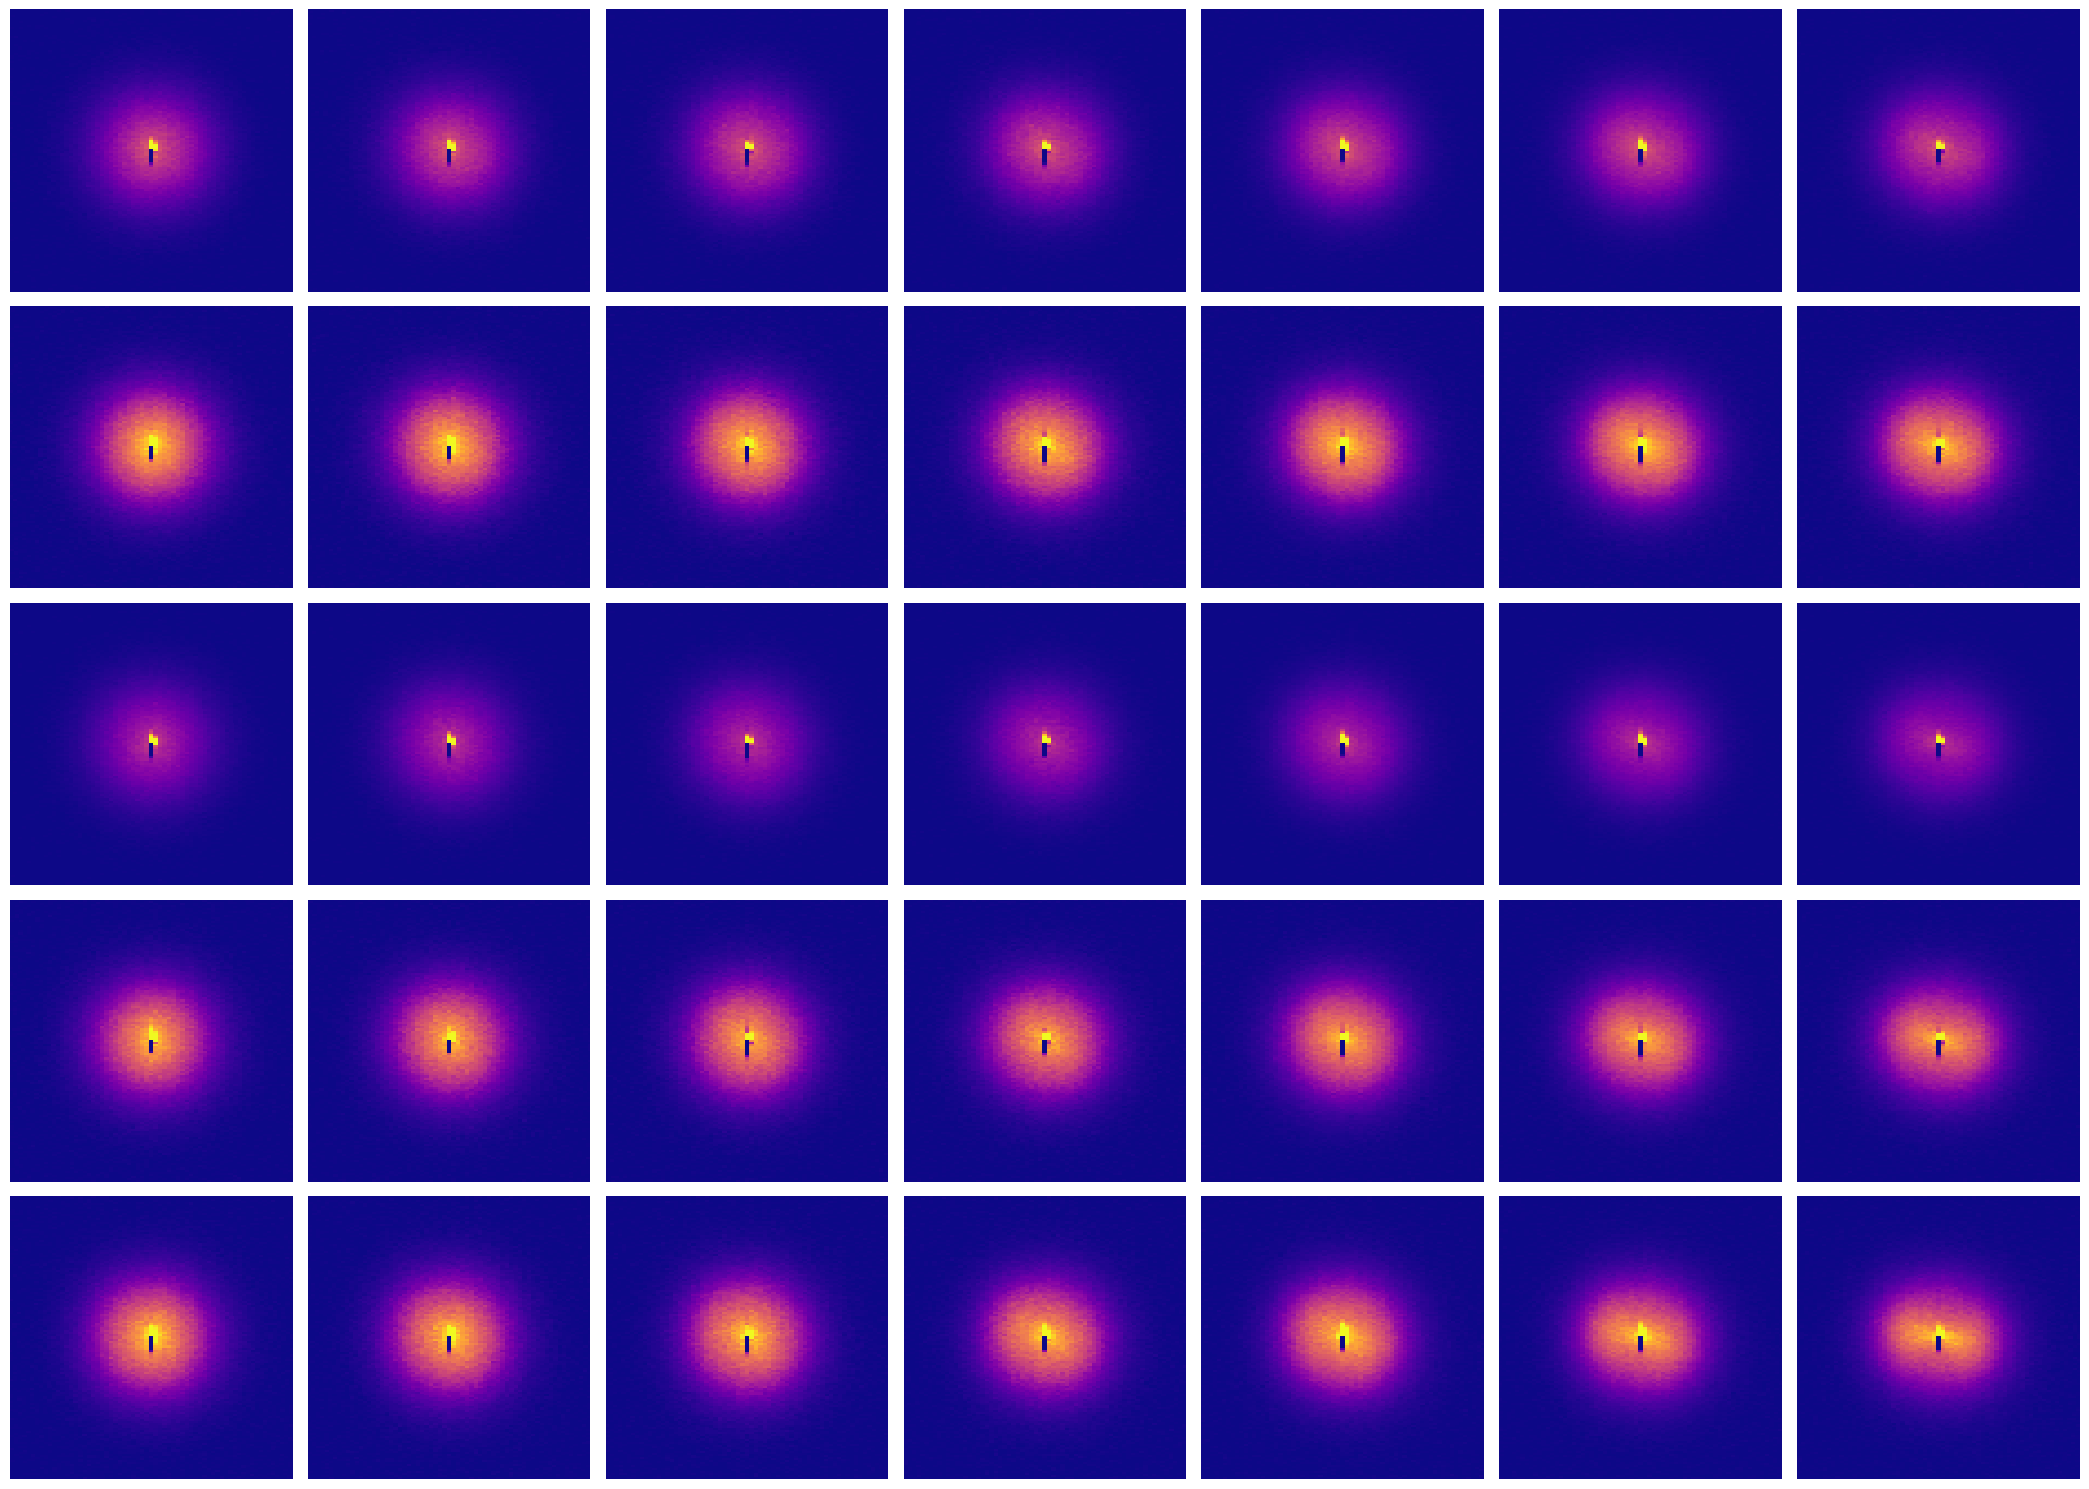

<Figure size 2100x1500 with 0 Axes>

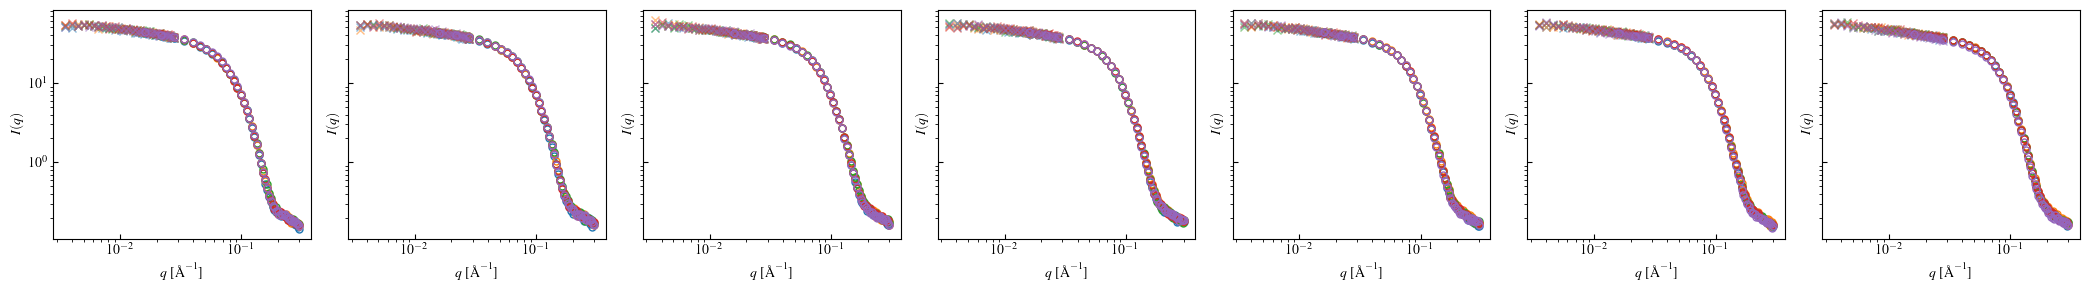

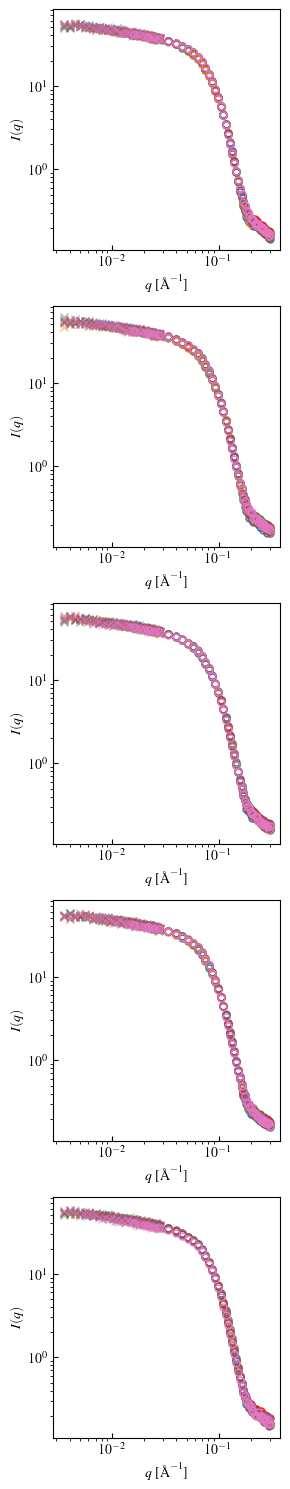

In [4]:
from scipy.interpolate import interp1d

# do inference for all data
position_list = [1,2,3,4,5]
shear_list = [0,1,2,3,4,5,6]
metadata_list = []
data_list = []
data_list_lq = []
color_list = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']

fig_1 = plt.figure(figsize=(21, 15))
fig_2 = plt.figure(figsize=(21, 15))
fig_3 = plt.figure(figsize=(21, 3))
fig_4 = plt.figure(figsize=(3, 15))
axs_3 = fig_3.subplots(1, len(shear_list), sharey=True)
axs_4 = fig_4.subplots(len(position_list), 1, sharey=True)
def process_and_plot_data(position_list, shear_list, color_list, fig_1, axs_3, data_list, data_list_lq, metadata_list):
    """
    Process and plot scattering data for all positions and shear values.
    """
    for index_shear, shear in enumerate(shear_list):
        for index_p, position in enumerate(position_list):
            # File paths
            filename = f"./data/ILL_shear/000{position}0{shear}.nxs"
            filename_lq = f"./data/ILL_shear/0000{position}{shear}.nxs"

            # --- Load high-q data ---
            with h5py.File(filename, 'r') as f:
                I_data = np.squeeze(f['/entry0/data2/MultiDetector2_data'][()])
                I_error = np.squeeze(f['/entry0/data2/error2'][()])
                qx = np.squeeze(f['/entry0/data2/qx2'][()])
                qy = np.squeeze(f['/entry0/data2/qy2'][()])
                sample_desc = f['/entry0/sample_description'][()]
                print("Sample description:", sample_desc[0].decode('utf-8'))

            # Filter valid data
            valid_mask = (~np.isnan(I_data)) & (~np.isnan(I_error)) & (I_data >= 0) & (I_error >= 0)
            qx_valid = qx[valid_mask]
            qy_valid = qy[valid_mask]
            I_data_valid = I_data[valid_mask]
            I_error_valid = I_error[valid_mask]

            # Radial average
            qlb, qub = 0.01, 0.3
            q_rad = np.linspace(qlb, qub, 50)
            dq = q_rad[1] - q_rad[0] if len(q_rad) > 1 else 0.01
            q_abs_valid = np.sqrt(qx_valid**2 + qy_valid**2)
            I_rad = np.full_like(q_rad, np.nan)
            I_error_rad = np.full_like(q_rad, np.nan)
            for i, q in enumerate(q_rad):
                mask = (q_abs_valid >= q) & (q_abs_valid < q + dq)
                if np.any(mask):
                    I_rad[i] = np.mean(I_data_valid[mask])
                    I_error_rad[i] = np.sqrt(np.sum(I_error_valid[mask]**2)/I_rad[i])

            # Store data and metadata
            data_list.append((I_data, I_error, qx, qy))
            metadata_list.append((position, shear))

            # Save raw data to txt
            output_filename = f"./data/ILL_shear/raw_pos{position}_shear{shear}.txt"
            with open(output_filename, "w") as f_out:
                f_out.write(f"Sample description: {sample_desc[0].decode('utf-8')}\n")
                f_out.write(f"Position: {position}, Shear: {shear}\n")
                f_out.write("qx\tqy\tI_data\tI_error\n")
                for qxi, qyi, idi, ierr in zip(qx.flatten(), qy.flatten(), I_data.flatten(), I_error.flatten()):
                    f_out.write(f"{qxi:.6f}\t{qyi:.6f}\t{idi:.6f}\t{ierr:.6f}\n")
            print(f"Saved raw data to {output_filename}")

            # Plot high-q data
            ax = fig_1.add_subplot(len(position_list), len(shear_list), index_p * len(shear_list) + index_shear + 1)
            c = ax.pcolormesh(qx, qy, I_data, shading='auto', cmap='plasma', vmin=0, vmax=50)
            ax.set_facecolor('black')
            ax.set_xlabel(r'$Q_x$ [$\mathrm{\AA}^{-1}$]', fontsize=10)
            ax.set_ylabel(r'$Q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=10)
            ax.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
            ax.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
            ax.tick_params(direction='in', labelsize=10)
            ax.set_axis_off()
            ax.set_xlim(-0.2, 0.2)
            ax.set_ylim(-0.2, 0.2)
            ax.set_aspect(1)

            # --- Load low-q data ---
            with h5py.File(filename_lq, 'r') as f_lq:
                I_data_lq = np.squeeze(f_lq['/entry0/data1/MultiDetector1_data'][()])
                I_error_lq = np.squeeze(f_lq['/entry0/data1/error1'][()])
                qx_lq = np.squeeze(f_lq['/entry0/data1/qx1'][()])
                qy_lq = np.squeeze(f_lq['/entry0/data1/qy1'][()])
            data_list_lq.append((I_data_lq, I_error_lq, qx_lq, qy_lq))
            
            # Radial average
            # Filter valid data for low-q
            valid_mask_lq = (~np.isnan(I_data_lq)) & (~np.isnan(I_error_lq)) & (I_data_lq >= 0) & (I_error_lq >= 0)
            qx_lq_valid = qx_lq[valid_mask_lq]
            qy_lq_valid = qy_lq[valid_mask_lq]
            I_data_lq_valid = I_data_lq[valid_mask_lq]
            I_error_lq_valid = I_error_lq[valid_mask_lq]

            # Radial average for low-q
            qlb_lq, qub_lq = 0.003, 0.028
            q_rad_lq = np.linspace(qlb_lq, qub_lq, 50)
            dq_lq = q_rad_lq[1] - q_rad_lq[0] if len(q_rad_lq) > 1 else 0.01
            q_abs_lq_valid = np.sqrt(qx_lq_valid**2 + qy_lq_valid**2)
            I_rad_lq = np.full_like(q_rad_lq, np.nan)
            I_error_rad_lq = np.full_like(q_rad_lq, np.nan)
            for i, q in enumerate(q_rad_lq):
                mask_lq = (q_abs_lq_valid >= q) & (q_abs_lq_valid < q + dq_lq)
                if np.any(mask_lq):
                    I_rad_lq[i] = np.mean(I_data_lq_valid[mask_lq])
                    I_error_rad_lq[i] = np.sqrt(np.sum(I_error_lq_valid[mask_lq]**2)/I_rad_lq[i])
                    
            ax_3 = axs_3[index_shear]
            
            # Plot radial average (low-q)
            # Find overlap range between low-q and high-q
            overlap_min = max(q_rad_lq[1], q_rad[1])
            overlap_max = min(q_rad_lq[-1], q_rad[-1])
            overlap_mask_lq = (q_rad_lq >= overlap_min) & (q_rad_lq <= overlap_max)
            overlap_mask_hq = (q_rad >= overlap_min) & (q_rad <= overlap_max)

            # Only scale if there are enough points in the overlap
            if np.any(overlap_mask_lq) and np.any(overlap_mask_hq):
                # Interpolate high-q to low-q q values in overlap
                interp_hq = interp1d(q_rad[overlap_mask_hq], I_rad[overlap_mask_hq], bounds_error=False, fill_value='extrapolate')
                I_rad_hq_interp = interp_hq(q_rad_lq[overlap_mask_lq])
                # Compute scaling factor (avoid nan/inf)
                valid = (I_rad_hq_interp > 0) & (I_rad_lq[overlap_mask_lq] > 0) & np.isfinite(I_rad_hq_interp) & np.isfinite(I_rad_lq[overlap_mask_lq])
                if np.any(valid):
                    scale = np.mean(I_rad_lq[overlap_mask_lq][valid] / I_rad_hq_interp[valid])
                else:
                    scale = 1.0
            else:
                scale = 1.0

            # Plot radial average (low-q)
            ax_3.plot(q_rad_lq[1:], I_rad_lq[1:], 'x', label=f'Low-Q pos{position}', color=color_list[index_p], alpha=0.5)

            # Plot scaled radial average (high-q)
            ax_3.plot(q_rad[1:], I_rad[1:] * scale, 'o', label=f'Shear {shear} (scaled)', color=color_list[index_p], fillstyle='none', markersize=5)
            ax_3.set_xlabel(r'$q$ [$\mathrm{\AA}^{-1}$]', fontsize=10)
            ax_3.set_ylabel(r'$I(q)$', fontsize=10)
            ax_3.tick_params(direction='in', labelsize=10)
            # ax_3.set_xlim(0, 0.2)
            # ax_3.set_ylim(0, 50)
            ax_3.set_xscale('log')
            ax_3.set_yscale('log')
            # print(f"Low-q range: {q_rad_lq[0]:.4f} to {q_rad_lq[-1]:.4f}, High-q range: {q_rad[0]:.4f} to {q_rad[-1]:.4f}")
            
            ax_4 = axs_4[index_p]
            ax_4.plot(q_rad_lq[1:], I_rad_lq[1:], 'x', label=f'Low-Q pos{position}', color=color_list[index_shear], alpha=0.5)
            ax_4.plot(q_rad[1:], I_rad[1:] * scale, 'o', label=f'Shear {shear} (scaled)', color=color_list[index_shear], fillstyle='none', markersize=5)
            ax_4.set_xlabel(r'$q$ [$\mathrm{\AA}^{-1}$]', fontsize=10)
            ax_4.set_ylabel(r'$I(q)$', fontsize=10)
            ax_4.tick_params(direction='in', labelsize=10)
            ax_4.set_xscale('log')
            ax_4.set_yscale('log')
            
            # Save the scale for each (position, shear) to a file
            with open("./data/ILL_shear/scale_factors.txt", "a") as scale_file:
                scale_file.write(f"Position: {position}, Shear: {shear}, Scale: {scale}\n")
            

# Call the function
process_and_plot_data(position_list, shear_list, color_list, fig_1, axs_3, data_list, data_list_lq, metadata_list)

        
fig_1.tight_layout() 
fig_2.tight_layout()   
fig_3.tight_layout()   
fig_4.tight_layout()   

## GPR

In [5]:
## Identification of principal axis 
def f_pl_obs(qx_obs, qy_obs, I_obs):
    qxqx = np.sum(I_obs * qx_obs * qx_obs)
    qxqy = np.sum(I_obs * qx_obs * qy_obs)
    qyqy = np.sum(I_obs * qy_obs * qy_obs)
    R = [[qxqx, qxqy], [qxqy, qyqy]]
    eigenvalues, eigenvectors = np.linalg.eig(R)
    principal_axis = eigenvectors[:, np.argmax(eigenvalues)]
    pl_eigen = np.arctan2(principal_axis[1], principal_axis[0])
    return pl_eigen

def f_C(theta, n, theta_0=0, bg=True):
    """
    Construct a symmetric cosine basis matrix evaluated at given angles.

    Parameters:
    - theta: array-like, angles where basis is evaluated (in radians)
    - n: number of non-constant cosine modes (n > 0)
    - theta_0: alignment angle for symmetry shift
    - bg: if True, include constant (isotropic) term in first column

    Returns:
    - C: (len(theta), n+1) array if bg=True, else (len(theta), n) array
    """
    theta = np.asarray(theta)
    theta_shift = theta - theta_0
    # n_list = 2 * (np.arange(n) + 1)  # modes: 2, 4, ..., 2n
    
    # Generate candidate p values: 1, 2, 3, 4, ..., and filter
    from sympy import isprime
    p_list = [p for p in range(1, 100) if p == 1 or isprime(p)]
    # Take the first `n` values
    p_list = p_list[:n]
    # Now generate n_list = 2 * p
    n_list = 2 * np.array(p_list)

    C_cos = np.cos(np.outer(theta_shift, n_list))  # shape (M, n)

    if bg:
        C_0 = np.ones((len(theta), 1))  # constant term
        C = np.concatenate([C_0, C_cos], axis=1)  # (M, n+1)
    else:
        C = C_cos  # (M, n)

    return C

def f_CS(theta, n, theta_0=0, bg=True):
    """
    Construct a real-valued Fourier basis with symmetric cosine and sine terms.

    Parameters:
    - theta: array-like, input angles in radians
    - n: number of cosine/sine harmonics (positive integers)
    - theta_0: alignment angle (shifts all basis functions)
    - bg: if True, include constant term as first column

    Returns:
    - C: (len(theta), 2n+1) if bg=True, else (len(theta), 2n)
         Columns ordered as [1, cos(2θ), ..., cos(2nθ), sin(2θ), ..., sin(2nθ)]
    """
    theta = np.asarray(theta)
    theta_shift = theta - theta_0
    # n_list = 2 * (np.arange(1, n + 1))  # modes: 2, 4, ..., 2n
    
    # Generate candidate p values: 1, 2, 3, 4, ..., and filter
    from sympy import isprime
    p_list = [p for p in range(1, 100) if p == 1 or isprime(p)]
    # Take the first `n` values
    p_list = p_list[:n]
    # Now generate n_list = 2 * p
    n_list = 2 * np.array(p_list)

    C_cos = np.cos(np.outer(theta_shift, n_list))  # (M, n)
    C_sin = np.sin(np.outer(theta_shift, n_list))  # (M, n)

    if bg:
        C_0 = np.ones((len(theta), 1))
        C = np.concatenate([C_0, C_cos, C_sin], axis=1)  # (M, 2n+1)
    else:
        C = np.concatenate([C_cos, C_sin], axis=1)       # (M, 2n)

    return C

def f_loglin(x, x_c=1):
    return np.where(x < x_c, (x-x_c)/x_c+np.log(x_c), np.log(x))
def f_loglin_inv(y, y_c=0):
    return np.where(y < y_c, (1+y-y_c)*np.exp(y_c), np.exp(y))

def bayesian_inference_ratio(I_obs, delta_I_obs, Q_obs, theta_obs, delta_Q, Q_eval, C_basis, mu_, lambda_,
                              mode="forward", log_transform=False, sine_basis=False, q_low=0.03, scale_low=0):
    """
    Perform Bayesian inference on the modulation I(Q, theta) / I_radial(Q).

    Parameters:
    - log_transform: if True, calculate the radial average on log I
    - sine_basis: if True, include sine basis functions
    - q_low: anisotropic coefficient vanishing at low q

    Returns:
    - A_MAP: MAP estimate of the harmonic coefficients (L x N)
    - I_radial_eval: estimated radial profile I_radial(Q_eval)
    """
    L = len(Q_eval)
    M = len(Q_obs)
    N = C_basis.shape[1]

    print(f"L (Q_eval): {L}, M (obs): {M}, N (basis): {N}")
    
    if log_transform:
        x_c = np.mean(I_obs)
        y_c = np.log(x_c)

        f_I = lambda I: f_loglin(I, x_c)
        f_inv_I = lambda fI: f_loglin_inv(fI, y_c)

        # --- Radial background estimation in transformed space ---
        fI_obs = f_I(I_obs)
        K_Qobs_to_Qeval = np.exp(-((Q_obs[:, None] - Q_eval[None, :]) ** 2) / (2 * mu_ ** 2))
        W_Qeval_from_Qobs = K_Qobs_to_Qeval / K_Qobs_to_Qeval.sum(axis=0, keepdims=True)
        fI_radial_eval = W_Qeval_from_Qobs.T @ fI_obs  # shape (L,)
        I_radial_eval = f_inv_I(fI_radial_eval)

        # --- Project radial profile back to observations ---
        K_Qobs_from_Qeval = np.exp(-((Q_obs[:, None] - Q_eval[None, :]) ** 2) / (2 * mu_ ** 2))
        W_Qobs_from_Qeval = K_Qobs_from_Qeval / K_Qobs_from_Qeval.sum(axis=1, keepdims=True)
        fI_radial_obs = W_Qobs_from_Qeval @ fI_radial_eval  # shape (M,)
        I_radial_obs = f_inv_I(fI_radial_obs)
    else:
        # --- Radial background estimation ---
        K_Qobs_to_Qeval = np.exp(-((Q_obs[:, None] - Q_eval[None, :]) ** 2) / (2 * mu_ ** 2))
        W_Qeval_from_Qobs = K_Qobs_to_Qeval / K_Qobs_to_Qeval.sum(axis=0, keepdims=True)
        I_radial_eval = W_Qeval_from_Qobs.T @ I_obs  # shape (L,)

        # --- Project radial profile back to observations ---
        K_Qobs_from_Qeval = np.exp(-((Q_obs[:, None] - Q_eval[None, :]) ** 2) / (2 * mu_ ** 2))
        W_Qobs_from_Qeval = K_Qobs_from_Qeval / K_Qobs_from_Qeval.sum(axis=1, keepdims=True)
        I_radial_obs = W_Qobs_from_Qeval @ I_radial_eval  # shape (M,)
    

    # --- Normalize observations ---
    I_mod = I_obs / I_radial_obs
    delta_I_mod = delta_I_obs / I_radial_obs

    # --- Construct design matrix (M x LN) ---
    G = (K_Qobs_to_Qeval[:, :, None] * C_basis[:, None, :]).reshape(M, L * N)

    # --- Prior covariance ---
    Q_diff_sq = (Q_eval[:, None] - Q_eval[None, :]) ** 2
    K_spatial = np.exp(-Q_diff_sq / (2 * lambda_ ** 2))
    K_spatial_full = np.kron(np.eye(N), K_spatial)

    from sympy import isprime
    p_list = [p for p in range(1, 100) if p == 1 or isprime(p)]
    # Take the first `n` values
    p_list = p_list[:N-1]
    if sine_basis:
        p_list = [p for p in range(1, 100) if p == 1 or isprime(p)]
        p_list = p_list[:(N-1)//2]
        p_list = [val for p in p_list for val in (p, p)]
    # Now generate n_list = 2 * p
    angular_penalty = np.array([0] + [(2*n) for n in p_list])
    
    # angular_penalty = np.array([0] + [(2*n) for n in range(1, N)])
    K_angular = np.kron(np.diag(angular_penalty), np.eye(L))
    
    # --- Q-dependent penalty (decaying as Q^{-2}) for harmonics n >= 1 ---
    Q_penalty = np.zeros((L, N))
    Q_weight = q_low**2 / np.maximum(Q_eval**2, 1e-6)  # avoid div-by-zero at Q = 0
    # Q_weight = np.exp(-Q_eval**2/2/q_low**2)  # exponential decay for low Q

    for j in range(1, N):
        Q_penalty[:, j] = Q_weight

    # Flatten to a diagonal penalty matrix
    K_lowQ = np.diag(Q_penalty.flatten())

    K_prior = K_spatial_full + K_angular + K_lowQ*scale_low

    # --- Prior mean ---
    A_prior_mean = np.zeros((L, N))
    A_prior_mean[:, 0] = 1.0 
    A_prior_flat = A_prior_mean.flatten()

    # --- Observation noise covariance ---
    Sigma = np.diag(delta_I_mod**2)

    # --- MAP Inference ---
    if mode == "forward":
        Sigma_inv = np.diag(1.0 / delta_I_mod**2)
        GT_Sinv = G.T @ Sigma_inv
        K_tilde_inv = GT_Sinv @ G + np.linalg.inv(K_prior) 
        K_tilde_inv = K_tilde_inv + 1e-6 * np.eye(K_tilde_inv.shape[0])
        rhs = GT_Sinv @ (I_mod - G @ A_prior_flat)
        # A_post_flat = A_prior_flat + cho_solve(cho_factor(K_tilde_inv), rhs)
        try:
            A_post_flat = A_prior_flat + cho_solve(cho_factor(K_tilde_inv), rhs)
        except np.linalg.LinAlgError:
            print("Cholesky failed, falling back to np.linalg.solve")
            A_post_flat = A_prior_flat + np.linalg.solve(K_tilde_inv, rhs)
        
    elif mode == "dual":
        residual = I_mod - G @ A_prior_flat
        G_K = G @ K_prior
        K_tilde = G_K @ G.T + Sigma
        A_post_flat = A_prior_flat + K_prior @ G.T @ cho_solve(cho_factor(K_tilde), residual)
    else:
        raise ValueError("mode must be 'forward' or 'dual'")

    A_MAP = A_post_flat.reshape(L, N)
    return A_MAP, I_radial_eval

def reconstruct_I_q(Q_eval, theta_eval, A_MAP, f_basis, mu_, theta_0=0.0,
                    direct=False, bg=True, I_radial_eval=None, log_transform=False, sine_basis = False):
    """
    Reconstruct the intensity modulation I(Q, theta)/I_radial(Q) or log-form.

    Parameters:
    - log_transform: If True, A_MAP represents log(I / I_radial)

    Returns:
    - I_modulated: shape (K, L), modulation (I / I_radial) or exp(log modulation)
    """
    L, N = A_MAP.shape
    K = len(theta_eval)

    # Angular basis matrix (K, N)
    C_arr = f_basis(theta_eval, N - 1 if bg else N, theta_0=theta_0, bg=bg)
    if sine_basis:
        C_arr = f_CS(theta_eval, (N - 1)//2 if bg else N//2, theta_0=theta_0, bg=bg)

    if direct:
        I_modulated = C_arr @ A_MAP.T  # (K, L)
    else:
        spatial_kernel_eval = np.exp(-((Q_eval[:, None] - Q_eval[None, :]) ** 2) / (2 * mu_ ** 2))  # (L, L)
        I_modulated = (spatial_kernel_eval @ A_MAP) @ C_arr.T  # (L, K)
        I_modulated = I_modulated.T  # shape (K, L)

    # Restore full I(Q, theta) if bg was removed
    if not bg:
        if I_radial_eval is None:
            raise ValueError("Must provide I_radial_eval if bg=False")
        I_modulated *= I_radial_eval[None, :]  # elementwise multiply

    return I_modulated

def reconstruct_I_q_ratio(Q_eval, theta_eval, A_MAP, f_basis, mu_, I_radial_eval,
                          theta_0=0.0, direct=False, log_transform=False, sine_basis = False):
    """
    Reconstruct full I(Q, theta) from inferred modulation coefficients and radial profile.

    Parameters:
    - log_transform: If True, treat A_MAP as log(I/I_radial)

    Returns:
    - I_full: (K, L) reconstructed intensity I(Q, theta)
    - I_mod:  (K, L) modulation (I/I_radial) or exp(log modulation)
    """
    I_mod = reconstruct_I_q(
        Q_eval, theta_eval, A_MAP, f_basis, mu_,
        theta_0=theta_0, direct=direct, bg=True,
        I_radial_eval=None, log_transform=log_transform, sine_basis = sine_basis
    )

    I_full = I_mod * I_radial_eval[None, :]  # restore I(Q, theta)
    return I_full, I_mod


In [7]:
filename_scale_factor = "./data/ILL_shear/scale_factors.txt"
with open(filename_scale_factor, "r") as f:
    scale_factors = f.readlines()

scale_quiescent = []
for line in scale_factors:
    if "Shear: 0" in line:
        parts = line.strip().split(",")
        scale = float(parts[-1].split(":")[1])
        scale_quiescent.append(scale)
print("Scale factors at quiescent state:", scale_quiescent)
scale_quiescent = scale_quiescent[:5]   

scale_shear = []
for line in scale_factors:
    if "Shear: 6" in line:
        parts = line.strip().split(",")
        scale = float(parts[-1].split(":")[1])
        scale_shear.append(scale)
print("Scale factors at shear state:", scale_shear)
scale_shear = scale_shear[:5] 
    

Scale factors at quiescent state: [1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354277, 1.1340884840198575, 1.8207659051677532, 1.1142108911821391, 2.409390522431617, 1.1846050579354

Sample description: TREATED: HQ CTAB at pos= 140.77 at rest 
Sample description: TREATED: HQ CTAB at pos= 140.97 at rest 
Sample description: TREATED: HQ CTAB at pos= 141.18 at rest 
Sample description: TREATED: HQ CTAB at pos= 141.36 at rest 


/tmp/ipykernel_1154493/1342466989.py:55: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-5, vmax=5)


Sample description: TREATED: HQ CTAB at pos= 141.54 at rest 


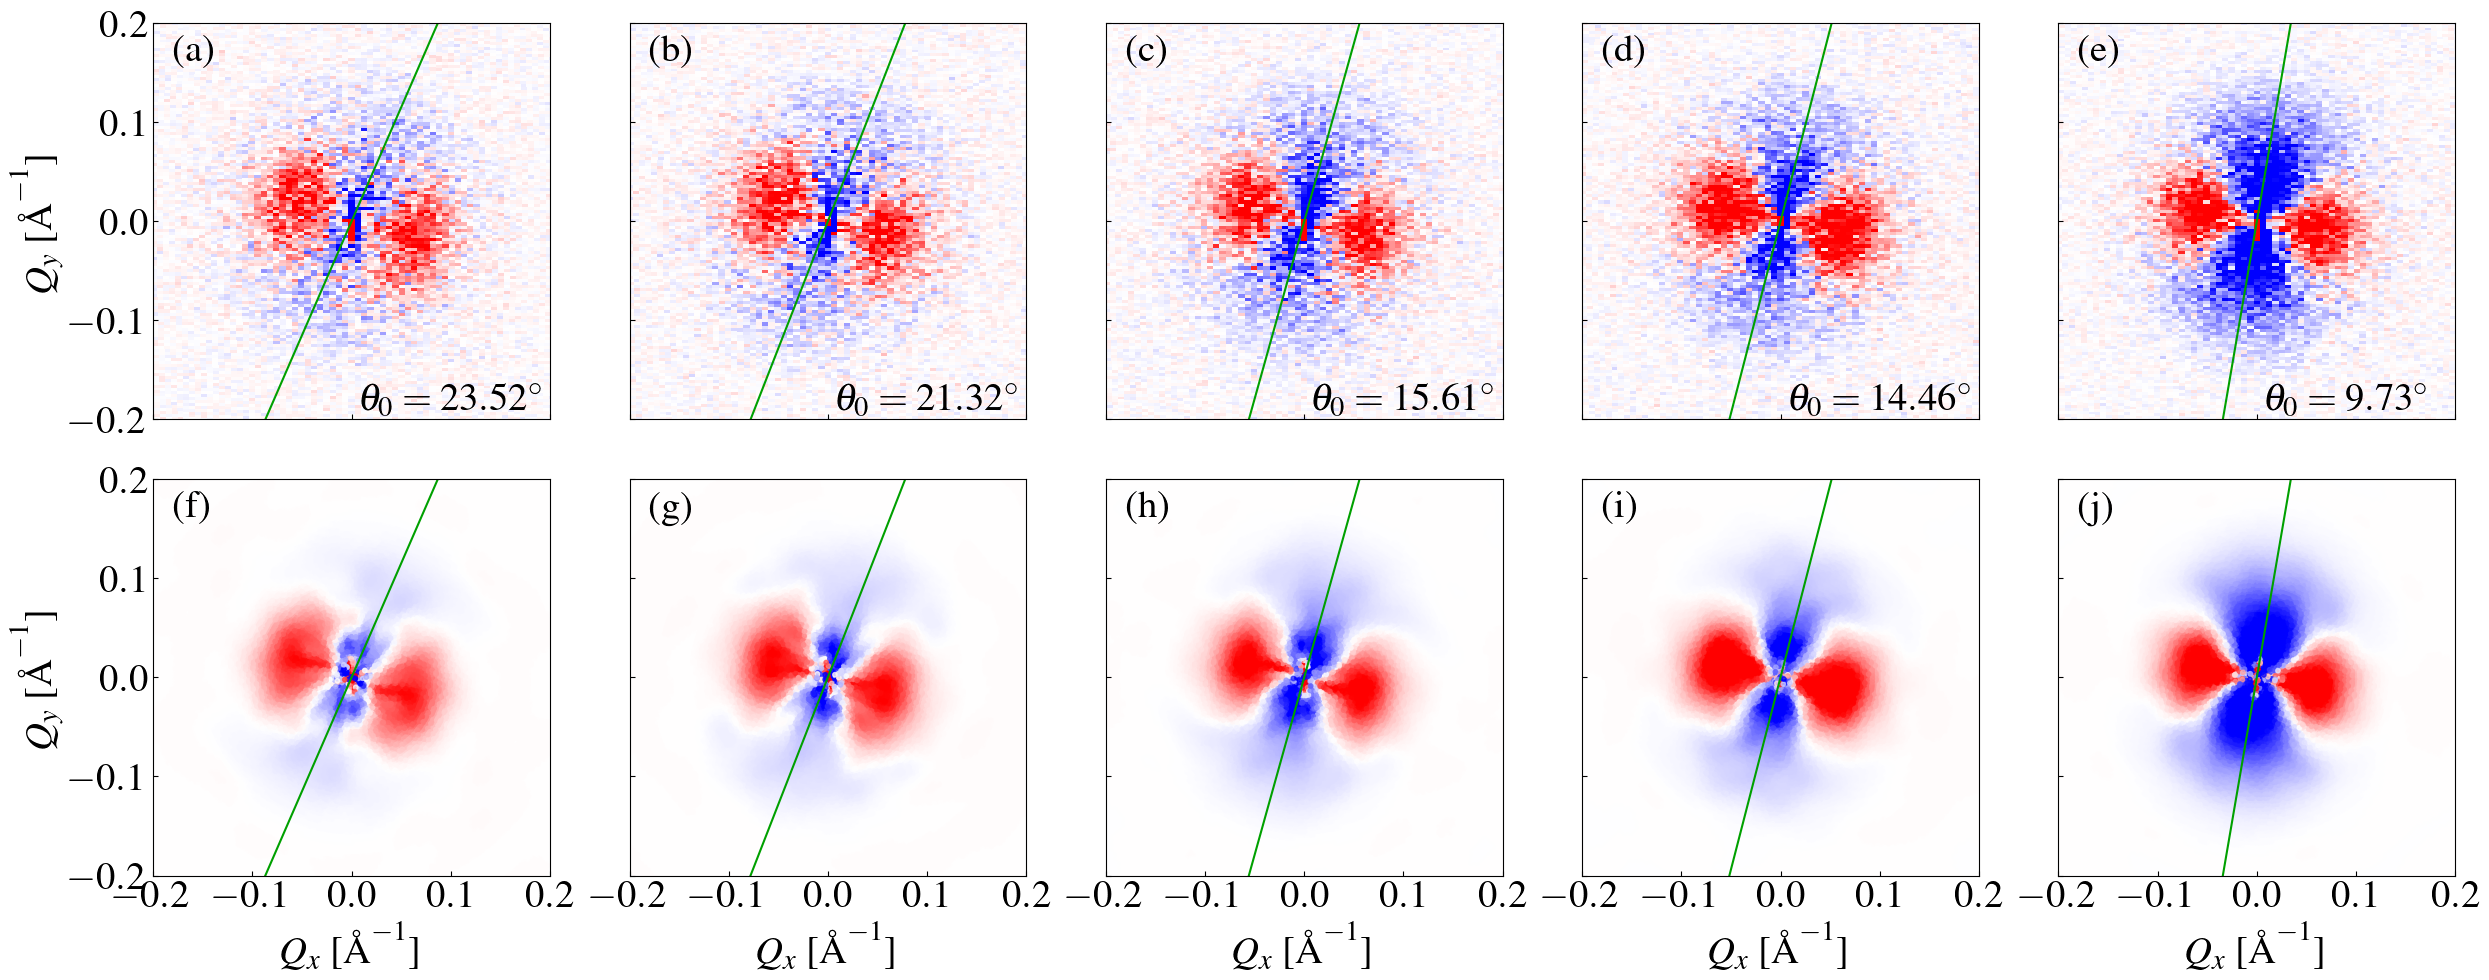

In [17]:
import numpy as np

## load data series
data_list = []
position_list = [1, 2, 3, 4, 5]
n_list = [8, 11, 11, 8, 5]
lambda_list = [0.045, 0.048, 0.045, 0.045, 0.03]

panels_list = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(k)", "(l)"]

fig = plt.figure(figsize=(25, 10))
for index, position in enumerate(position_list):
    filename = f"./data/ILL_shear/000{position}00.nxs" 
    
    I_data_list = []
    I_error_list = []
    with h5py.File(filename, 'r') as f:        
        path_data = '/entry0/data2/MultiDetector2_data'
        path_error = '/entry0/data2/error2'
        path_qx = '/entry0/data2/qx2'
        path_qy = '/entry0/data2/qy2'

        # Load and squeeze to remove singleton dimension
        I_data = np.squeeze(f[path_data][()])
        I_error = np.squeeze(f[path_error][()])
        qx = np.squeeze(f[path_qx][()])
        qy = np.squeeze(f[path_qy][()])
        I_data_list.append(I_data)
        I_error_list.append(I_error)
        sample_desc = f['/entry0/sample_description'][()]
        print("Sample description:", sample_desc[0].decode('utf-8'))
        
    filename = f"./data/ILL_shear/000{position}06.nxs"
    with h5py.File(filename, 'r') as f:
        path_data = '/entry0/data2/MultiDetector2_data'
        path_error = '/entry0/data2/error2'
        path_qx = '/entry0/data2/qx2'
        path_qy = '/entry0/data2/qy2'

        # Load and squeeze to remove singleton dimension
        I_data = np.squeeze(f[path_data][()])
        I_error = np.squeeze(f[path_error][()])
        qx = np.squeeze(f[path_qx][()])
        qy = np.squeeze(f[path_qy][()])
        I_data_list.append(I_data)
        I_error_list.append(I_error)
        
    I_diff = I_data_list[1]*scale_shear[index] - I_data_list[0]*scale_quiescent[index]
    I_diff_err = np.sqrt((I_error_list[0]*scale_quiescent[index])**2 + (I_error_list[1]*scale_shear[index])**2)
    data_list.append((I_diff, I_diff_err, qx, qy))
    
    # Plot using object-oriented API
    ax = fig.add_subplot(2,5,index+1)

    c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-5, vmax=5)
    # c2 = ax.pcolormesh(-qx, -qy, I_diff, shading='auto', cmap='viridis')
    # fig.colorbar(c, ax=ax, label='Intensity')

    # ax.set_title('Scattering Intensity Map')
    ax.set_facecolor('black')

    # Axis label control
    if index % 5 == 0:
        ax.set_ylabel(r'$Q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=28)
    else:
        ax.set_yticklabels([])
    ax.set_xticklabels([])
    # ax.set_xlabel(r'$Q_x$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
    
    # ax.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
    ax.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    ax.tick_params(direction='in', labelsize=28)
    # Plot a line aligned with pl_eigen
    ax.text(0.05, 0.9, panels_list[index], color='k', fontsize=28, fontweight='bold', transform=ax.transAxes)

    # ax.set_xlim(np.min(qx)*1.05, np.max(qx)*1.05)
    # ax.set_ylim(np.min(qx)*1.05, np.max(qx)*1.05)
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.2, 0.2)
    ax.set_aspect(1)
    ax.set_facecolor('black')
    
    qx_flat = qx.flatten()
    qy_flat = qy.flatten()
    I_diff_flat = I_diff.flatten()
    I_diff_err_flat = I_diff_err.flatten()

    Q_obs_all = np.sqrt(qx_flat**2 + qy_flat**2)
    theta_obs_all = np.arctan2(qy_flat, qx_flat)
    # Apply full mask as boolean condition
    # valid = (Q_obs_all > 0.01) & (Q_obs_all < 0.3) & (np.abs(I_diff_flat)<10)
    valid = (Q_obs_all > 0.001) & (Q_obs_all < 0.3) & (I_data_list[0].flatten() > 0) & (I_data_list[1].flatten() > 0)
    Q_obs = np.asarray(Q_obs_all[valid])
    theta_obs = np.asarray(theta_obs_all[valid])
    I_obs = np.asarray(I_diff_flat[valid])
    delta_I_obs = np.asarray(I_diff_err_flat[valid])
    I_sheared_obs = np.asarray(I_data_list[1].flatten()[valid])
    pl_eigen = f_pl_obs(Q_obs * np.cos(theta_obs), Q_obs * np.sin(theta_obs), I_sheared_obs)
    q_max = np.max(np.abs([np.min(qx), np.max(qx), np.min(qy), np.max(qy)]))
    x_line = np.array([-q_max, q_max])
    y_line = np.tan(pl_eigen+np.pi/2) * x_line
    ax.plot(x_line, y_line, color='#00A000', linestyle='-', linewidth=1.5, label='pl eigen')
    ax.text(0.52, 0.025, r"$\theta_0 = {:.2f}^{{\circ}}$".format(-np.degrees(pl_eigen)), color='k', fontsize=28, fontweight='bold', transform=ax.transAxes)

    
    # GPR ---------------------------------------------------------------
    filename_infer_quiescent = f"./data/ILL_shear/infer_pos{position}_shear0.txt"
    filename_infer_sheared = f"./data/ILL_shear/infer_pos{position}_shear6.txt"
    def load_infer(filename_infer):
        # Load inferred results from file
        with open(filename_infer, 'r') as f_infer:
            lines = f_infer.readlines()

        # Find header lines and data start
        for i, line in enumerate(lines):
            if line.startswith('# Q_eval (vector):'):
                q_eval_start = i + 1
            if line.startswith('# I_radial_eval (vector):'):
                i_radial_start = i + 1
            if line.startswith('# theta_eval (vector):'):
                theta_eval_start = i + 1
            if line.startswith('# I_eval (2D grid'):
                i_eval_start = i + 1
                break

        # Parse Q_eval
        Q_eval = np.array([float(x) for x in lines[q_eval_start].strip().split('\t')])

        # Parse I_radial_eval
        I_radial_eval = np.array([float(x) for x in lines[i_radial_start].strip().split('\t')])

        # Parse theta_eval
        theta_eval = np.array([float(x) for x in lines[theta_eval_start].strip().split('\t')])

        # Parse I_eval grid
        I_eval_lines = lines[i_eval_start:i_eval_start + len(theta_eval)]
        I_eval = np.array([[float(val) for val in l.strip().split('\t')] for l in I_eval_lines])

        # Create meshgrid for plotting
        Q_eval_grid, theta_eval_grid = np.meshgrid(Q_eval, theta_eval)
        Qx_eval = Q_eval_grid * np.cos(theta_eval_grid)
        Qy_eval = Q_eval_grid * np.sin(theta_eval_grid)

        # Flatten for scatter plot
        I_eval_flat = I_eval.flatten()
        theta_eval_flat = theta_eval_grid.flatten()
        Qx_eval_flat = Qx_eval.flatten()
        Qy_eval_flat = Qy_eval.flatten()

        return Q_eval, I_radial_eval, theta_eval, I_eval, Qx_eval, Qy_eval, I_eval_flat, theta_eval_flat, Qx_eval_flat, Qy_eval_flat

    # Load quiescent data
    Q_eval, I_radial_eval, theta_eval, I_eval, Qx_eval, Qy_eval, I_eval_flat, theta_eval_flat, Qx_eval_flat, Qy_eval_flat = load_infer(filename_infer_quiescent)
    I_eval_flat_quiescent = I_eval_flat * scale_quiescent[index]

    # Load sheared data
    Q_eval_sheared, I_radial_eval_sheared, theta_eval_sheared, I_eval_sheared, Qx_eval_sheared, Qy_eval_sheared, I_eval_flat_sheared, theta_eval_flat_sheared, Qx_eval_flat_sheared, Qy_eval_flat_sheared = load_infer(filename_infer_sheared)
    I_eval_flat_sheared = I_eval_flat_sheared * scale_shear[index]

    I_infer_diff =  I_eval_flat_sheared - I_eval_flat_quiescent
    
    ax = fig.add_subplot(2,5,index+6)
    index_shuffle = np.arange(I_eval_flat_sheared.size)
    np.random.shuffle(index_shuffle)
    sc = ax.scatter(Qx_eval_flat[index_shuffle], Qy_eval_flat[index_shuffle], c=I_infer_diff[index_shuffle],
                    s=10, alpha=0.75, cmap=cmap, vmin = -5, vmax = 5)
    ax.plot(x_line, y_line, color='#00A000', linestyle='-', linewidth=1.5, label='pl eigen')
        # Axis label control
    if index % 5 == 0:
        ax.set_ylabel(r'$Q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=28)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel(r'$Q_x$ [$\mathrm{\AA}^{-1}$]', fontsize=28)
    # ax.set_ylabel(r'$Q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
    ax.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
    ax.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    ax.tick_params(direction='in', labelsize=28)

    # ax.set_xlim(np.min(qx)*1.05, np.max(qx)*1.05)
    # ax.set_ylim(np.min(qx)*1.05, np.max(qx)*1.05)
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.2, 0.2)
    ax.set_aspect(1)
    
    ax.set_facecolor('w')
    ax.text(0.05, 0.9, panels_list[index+5], color='k', fontsize=28, fontweight='bold', transform=ax.transAxes)

    

plt.tight_layout()

In [ ]:
# qx_flat = qx.flatten()
# qy_flat = qy.flatten()
# I_diff_flat = I_diff.flatten()
# I_diff_err_flat = I_diff_err.flatten()

# Q_obs_all = np.sqrt(qx_flat**2 + qy_flat**2)
# theta_obs_all = np.arctan2(qy_flat, qx_flat)
# # Apply full mask as boolean condition
# valid = (Q_obs_all > 0.001) & (Q_obs_all < 0.3) & (I_data_list[0].flatten() > 0) & (I_data_list[1].flatten() > 0)

# # Final filtered arrays (force regular ndarray)
# Q_obs = np.asarray(Q_obs_all[valid])
# theta_obs = np.asarray(theta_obs_all[valid])
# I_obs = np.asarray(I_diff_flat[valid])
# delta_I_obs = np.asarray(I_diff_err_flat[valid])

# # Q for evaluation
# Q_eval = np.linspace(0.001, np.max(qx), 100)  # Define Q_eval range
# theta_eval = np.linspace(-np.pi, np.pi, 360, endpoint=False)
# # pl_eigen = np.pi/2  # Convert to radians
# pl_eigen = f_pl_obs(Q_obs * np.cos(theta_obs), Q_obs * np.sin(theta_obs), I_obs)

# # --- Step 3: Angular basis setup (include constant term for I/I_radial) ---
# n = 5
# bg = True  # Must include constant term
# C_arr = f_C(theta_obs, n, theta_0=pl_eigen, bg=bg)

# # --- Step 4: Inference parameters ---
# lambda_ = 0.03
# mu_ = 0.03
# delta_Q = Q_eval[1] - Q_eval[0]
# log_transform = False  # <--- Enable log-transformed inference
# eps = 1e-8  # small positive number to prevent log(0) 

# # --- Step 5: Perform inference on log(I/I_radial) or I/I_radial ---
# A_MAP, I_radial_eval = bayesian_inference_ratio(
#     I_obs, delta_I_obs, Q_obs, theta_obs,
#     delta_Q, Q_eval, C_arr, mu_, lambda_,
#     mode="forward",
#     log_transform=log_transform, q_low=0.01, scale_low=1
# )
# print(A_MAP.shape)

# # --- Step 7: Reconstruct I(q, theta) ---
# I_eval, I_mod = reconstruct_I_q_ratio(
#     Q_eval, theta_eval, A_MAP, f_C, mu_,
#     I_radial_eval, theta_0=pl_eigen, direct=False,
#     log_transform=log_transform
# )

L (Q_eval): 100, M (obs): 11249, N (basis): 6
(100, 6)


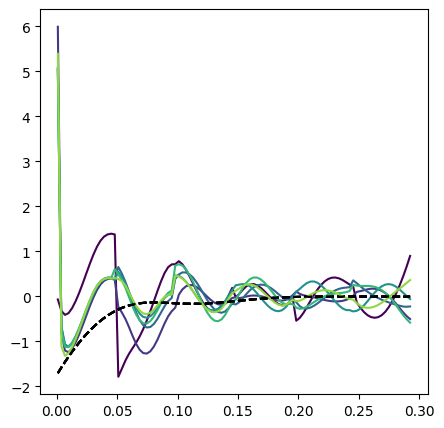

In [ ]:
# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111)

# for i_n in range(A_MAP.shape[1]):
#     ax.plot(Q_eval, A_MAP[:, i_n], label=f'Harmonic {i_n+1}', color=matplotlib.cm.get_cmap('viridis')(i_n / A_MAP.shape[1]))
#     ax.plot(Q_eval, I_radial_eval, label='Radial Profile', color='black', linestyle='--')

In [ ]:
# # Inferred results ---------------------------------------------------------------
# # Total number of pixels (needed for normalization)
# # Evaluate grids and flat
# Q_eval_grid, theta_eval_grid = np.meshgrid(Q_eval, theta_eval)
# Qx_eval = Q_eval_grid * np.cos(theta_eval_grid)
# Qy_eval = Q_eval_grid * np.sin(theta_eval_grid)

# # flat
# I_eval_flat = I_eval.flatten()

# # Compute radial backgrounds
# I_eval_radial = np.mean(I_eval, axis=0)[None, :]
# I_eval_radial_flat = np.tile(I_eval_radial, (len(theta_eval), 1)).flatten()

# # Shuffle indices
# index_shuffle = np.arange(I_eval_flat.size)
# np.random.shuffle(index_shuffle)

# # Apply shuffle to everything
# theta_eval_flat = theta_eval_grid.flatten()[index_shuffle]
# Q_eval_flat = Q_eval_grid.flatten()[index_shuffle]
# Qx_eval_flat = Qx_eval.flatten()[index_shuffle]
# Qy_eval_flat = Qy_eval.flatten()[index_shuffle]
# I_eval_flat = I_eval_flat[index_shuffle]
# I_eval_radial_flat = I_eval_radial_flat[index_shuffle]

/tmp/ipykernel_570695/1163225090.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-4, vmax=4)


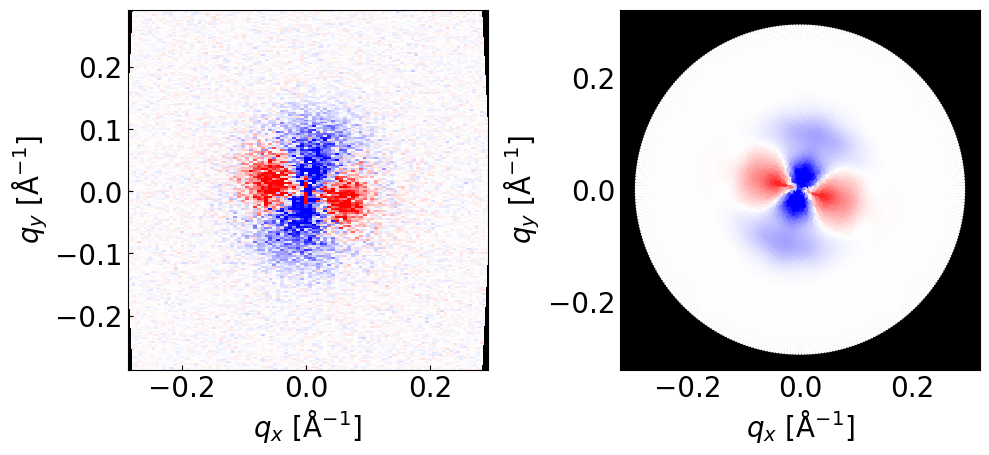

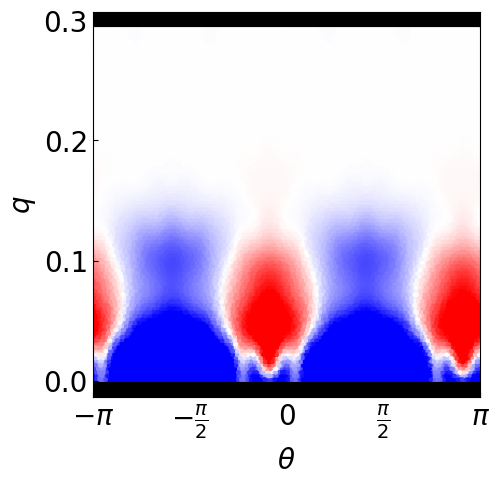

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(122)
# sc = ax.scatter(Qx_eval_flat, Qy_eval_flat, c=I_eval_flat,
#                 s=2, alpha=1, cmap=cmap, vmin = -4, vmax = 4)
# ax.set_xlabel(r'$x$', fontsize=20)
# ax.set_ylabel(r'$y$', fontsize=20)
# ax.tick_params(direction='in', labelsize=20)
# ax.set_xlabel(r'$q_x$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
# ax.set_ylabel(r'$q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
# ax.set_aspect(1)
# ax.set_facecolor('black')

# ax = fig.add_subplot(121)

# c = ax.pcolormesh(qx, qy, I_diff, shading='auto', cmap=cmap, vmin=-4, vmax=4)
# # c2 = ax.pcolormesh(-qx, -qy, I_diff, shading='auto', cmap='viridis')
# # fig.colorbar(c, ax=ax, label='Intensity')

# ax.set_xlabel(r'$q_x$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
# ax.set_ylabel(r'$q_y$ [$\mathrm{\AA}^{-1}$]', fontsize=20)
# # ax.set_title('Scattering Intensity Map')
# ax.set_facecolor('black')
# ax.tick_params(direction='in', labelsize=20)

# ax.set_xlim(np.min(qx), np.max(qx))
# ax.set_ylim(np.min(qx), np.max(qx))
# ax.set_aspect(1)
# ax.set_facecolor('black')
# plt.tight_layout()

# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111)
# sc = ax.scatter(theta_eval_flat, Q_eval_flat, c=I_eval_flat,
#                 s=5, alpha=1, cmap=cmap, vmin = -2, vmax = 2)
# ax.set_xlabel(r'$\theta$', fontsize=20)
# ax.set_ylabel(r'$q$', fontsize=20)
# ax.set(xlim=(-np.pi, np.pi), 
#        xticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
#        xticklabels=[r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'],
#        xlabel=r'$\theta$', ylabel=r'$q$')
# ax.set_xlabel(r'$\theta$', fontsize=20)
# ax.set_ylabel(r'$q$', fontsize=20)
# ax.tick_params(direction='in', labelsize=20)
# ax.set_facecolor('black')


In [11]:
scale_quiescent

[1.8207659051677532,
 1.1142108911821391,
 2.409390522431617,
 1.1846050579354277,
 1.1340884840198575]

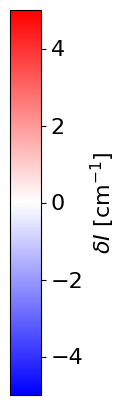

In [14]:
# Create a vertical colorbar according to the time list in viridis colormap
fig, ax = plt.subplots(figsize=(0.4, 5))
norm = plt.Normalize(vmin=-5, vmax=5)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=ax)
cbar.set_label(r'$\delta I\ [\mathrm{cm}^{-1}]$', fontsize=16)
cbar.ax.tick_params(labelsize=16)